In [60]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 3:

part 2:

In [61]:
#define image1 here
image1 = np.array([[150, 151, 153, 155, 156, 155, 154],
                    [150, 151, 153, 155, 156, 155, 154],
                    [150, 151, 153, 155, 156, 155, 154],
                    [150, 151, 153, 155, 156, 155, 154],
                    [150, 151, 153, 155, 156, 155, 154]])
print(image1)
image1 = image1.astype(np.uint8)


[[150 151 153 155 156 155 154]
 [150 151 153 155 156 155 154]
 [150 151 153 155 156 155 154]
 [150 151 153 155 156 155 154]
 [150 151 153 155 156 155 154]]


In [62]:
#code here
#first define a function for calculating histogram
def calc_hist(image):
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    return hist

Text(0.5, 1.0, 'histogram')

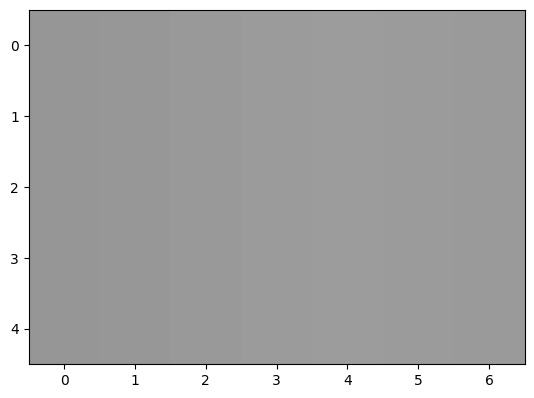

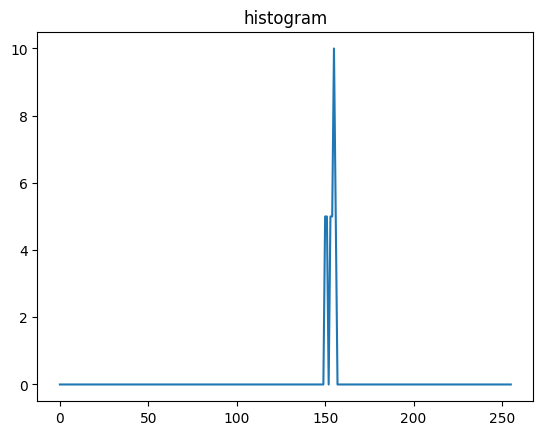

In [63]:
#dont change this cell
plt.imshow(image1,cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(image1))
plt.title('histogram')

In [64]:
#code here
#define a function (stretch) for stretching(input:image , output: stretched image)


def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  image_min = np.min(image)
  image_max = np.max(image)
    
  image_range = image_max - image_min
    
    # Scale the pixel values to lie in the range [0, 255]
    # model for ro hame pixel ha va emal formule
  output_image = 255 *( (image - image_min) / image_range )
    
  output_image = output_image.astype(np.uint8)
  # Start
  
  # End
  return output_image


Text(0.5, 1.0, 'new histogram')

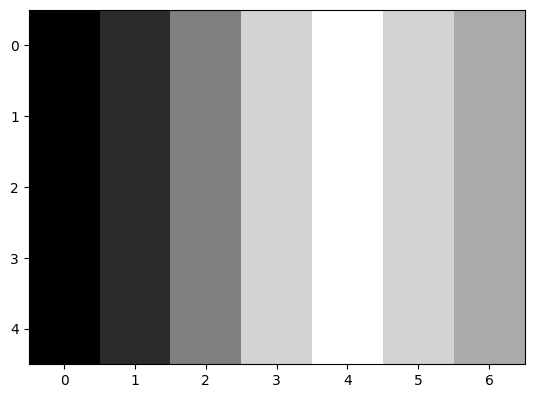

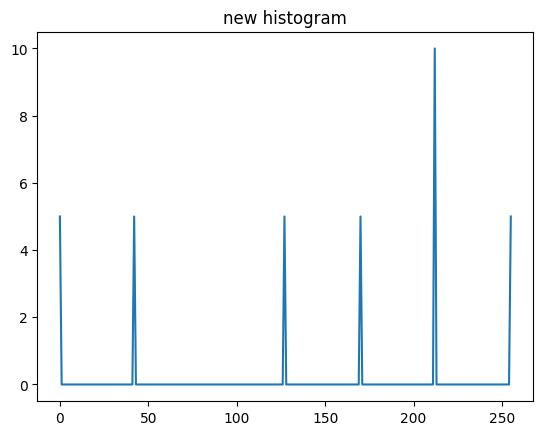

In [65]:
#dont change this cell
plt.imshow(stretch_hist(image1),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image1)))

plt.title('new histogram')

# part3


<Figure size 640x480 with 0 Axes>

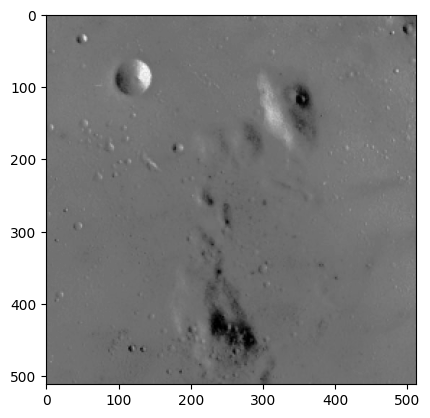

<Figure size 640x480 with 0 Axes>

In [88]:
# first read the image and show it.(image2)
image2=cv2.imread("Q3_image\image2.jpg",0)
plt.imshow(image2,cmap='gray',vmin=0,vmax=255)
plt.figure()
# plt.plot(calc_hist(image2))

# plt.title('new histogram')


Text(0.5, 1.0, 'new histogram')

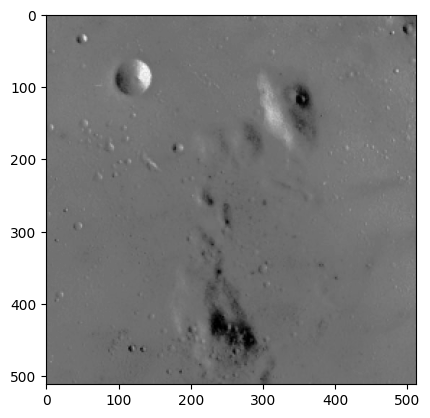

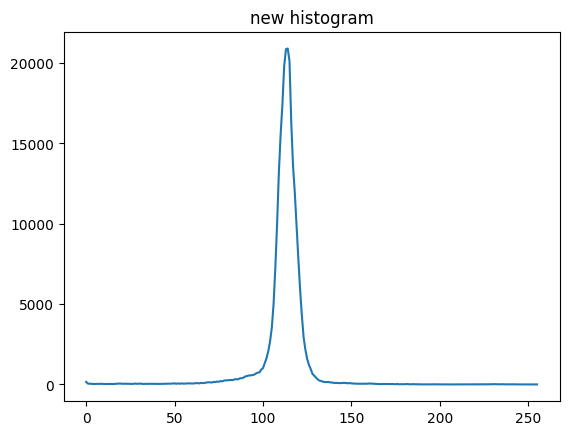

In [67]:
#use stretch function to improve quality of the image and show it
image2=cv2.imread("Q3_image\image2.jpg",0)
plt.imshow(stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(stretch_hist(image2)))

plt.title('new histogram')

In [85]:
#define new function that can improve this image 

def modified_stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with modified histogram stretching
  '''
  output_image = image.copy()
  output_image= stretch_with_clip(image, 1.0)
  return output_image
def stretch_with_clip(image, clip_percent):
    # Compute minimum and maximum pixel values after clipping
    # reval 2d->1d
    # percentile:sort mikone va data bade on darsad ro barmigardone
    pixel_vals = image.ravel()
    clip_min, clip_max = np.percentile(image, clip_percent,method="nearest"), np.percentile(image, 100.0-clip_percent,method="nearest")
    
    # Stretch the image using the clipped minimum and maximum values
    stretched_image = np.clip(image,clip_min,clip_max).astype(np.uint8)
    stretched_image=stretch_hist(stretched_image)
    return stretched_image



Text(0.5, 1.0, 'new histogram')

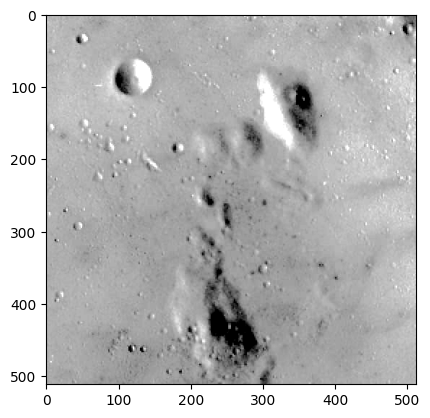

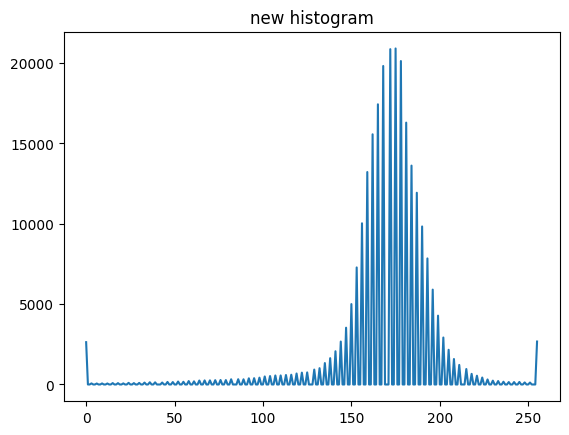

In [86]:
#try your new function and show the result
image2=cv2.imread("Q3_image\image2.jpg",0)
plt.imshow(modified_stretch_hist(image2),cmap='gray',vmin=0,vmax=255)
plt.figure()
plt.plot(calc_hist(modified_stretch_hist(image2)))

plt.title('new histogram')



